In [3]:
#from medpy.io import load
import medpy.io as mp
import numpy as np
import os
from PIL import Image, ImageOps

In [5]:
#print("Las carpetas Flair parece que tienen la RAW data")
#print("Las carpetas T1 parece que tienen la RAW data")
#print("Las carpetas T2 parece que tienen la RAW data")
#print("Las carpetas 3more parece que tienen el ground truth")

In [4]:
os.getcwd()

'/home/vicbr/0Magister/TesisDocumentos/Modelos/tensorflow-deeplab-resnet_VBS/utilsVIC/AsignarPaletaEnMasa'

In [5]:
print("Hay que hacer un loop para recorrer todos los stacks de todas las imagenes del dataset, para transformarlas a imagenes")
print("Por lo menos sirve para transformar las imagenes de las carpetas 3 more (ground truth) a png")

Hay que hacer un loop para recorrer todos los stacks de todas las imagenes del dataset, para transformarlas a imagenes
Por lo menos sirve para transformar las imagenes de las carpetas 3 more (ground truth) a png


In [3]:
def ejemplo1solaimagen():
    print("esta extrae imagenes de un tiff que tienen una sola imagen")
    palette=[]
    for i in range(256):
        palette.extend((i,i,i))
    print("Queda una lista de esta forma: ","[0, 0, 0, 1, 1, 1,...256,256,256 ]")
        #print("type: ",type(palette))
        #print(palette)
        #print("len palete: ",len(palette))
    print("Esto hace que se impriman los primeros 63 resultados: ",palette[:3*21])
    palette[:3*21]=np.array([[0, 0, 0],#Background
                                [128, 0, 0],#Aeroplane
                                [0, 128, 0],#Bicycle
                                [128, 128, 0],#Bird
                                [0, 0, 128],#Boat
                                [128, 0, 128],#Bottle
                                [0, 128, 128],#Bus
                                [128, 128, 128],#Car
                                [64, 0, 0],#Cat
                                [192, 0, 0],#Chair
                                [64, 128, 0],#Cow
                                [192, 128, 0],#DiningTable
                                [64, 0, 128],#Dog
                                [192, 0, 128],#Horse
                                [64, 128, 128],#Motorbike
                                [192, 128, 128],#Person
                                [0, 64, 0],#Potted-plant
                                [128, 64, 0],#Sheep
                                [0, 192, 0],#Sofa
                                [128, 192, 0],#Train
                                [0, 64, 128]#TVMonitor
                             ], dtype='uint8').flatten()
    print("palette[:3*21]", palette[:3*21])#Como que solo se ocupan los 3*21 elementos y los dems no se usan (en total son 3*256)
    print("palette[:100]", palette[:100])
    
    url_input=r"/home/vicbr/0Magister/TesisDocumentos/Modelos/tensorflow-deeplab-resnet_VBS/utilsVIC/EmbryoDataset/TiffsOriginales/"
    archivo_inputP=r"SegmentedPequeñas/celulaspequenas.tif"
    archivo_inputG=r"SegmentedGrandes/celulasgrandes.tif"    
    
    #print("len palete: ",len(palette[:3*21]))
    arr1 = np.array(Image.open(url_input+archivo_inputP))#Dimension 1024x1024
    arr2 = np.array(Image.open(url_input+archivo_inputG)) #Dimension 1024x1024

    print("1 para celulas chicas (rojo), 2 para grandes (verde)")
    arr_out=arr1.copy()
    
    
    arr_out[arr1>0]=1  #Todos los pixeles de la imagen 1 que no sean fondo (0) en la imagen 1 valen 1. Según la paleta 1 es R=128,0,0 y 2 es G=0,128,0
    arr_out[arr2>15]=2 #Todos los pixeles de la imagen 2 que no sean fondo (0) en la imagen 2 y que no sean fondo tampoco en la imagen 1 (0), valen 2. Según la paleta 1 es R=128,0,0 y 2 es G=0,128,0
    arr_out[(arr1>0) & (arr2>15)]=4
    #arr_out[0:100]=3
    

    im=Image.fromarray(arr_out) 
    im.putpalette(palette)
    im.save("combinadasout.png")

In [4]:
#ejemplo1solaimagen()

In [83]:
def obtenerSlicesSecuencialDesdeTIFF(str_input):
    #print("Este bloque para raw data")

    #carpetaRoot="brats_2013_pat0002_1/"
    #carpetaSub=r"/VSD.Brain.XX.O.MR_T2.54521//"
    #archivo=r"VSD.Brain.XX.O.MR_T2.54521.mha"
    url_input=r"/home/vicbr/0Magister/TesisDocumentos/Modelos/tensorflow-deeplab-resnet_VBS/utilsVIC/EmbryoDataset/TiffsOriginales/"
    url_output=r"/home/vicbr/0Magister/TesisDocumentos/Modelos/tensorflow-deeplab-resnet_VBS/utilsVIC/AsignarPaletaEnMasa/OutputTIFF2Secuencial/"
    
    if(str_input=="raw"):
        archivo_input=r"Raw/embryo.tif"
        directory_output=r"RawSecuencial/"
        
        image_data, image_header = mp.load(url_input+archivo_input)
        
        for i in range(0,image_data.shape[2]):
        #print(i)
        #if False:
            im = Image.fromarray(image_data[:,:,i])
            im = im.convert('RGB')
            im = im.resize((500, 500))
            im = ImageOps.flip(im)
            im = im.rotate(-90)
            im.save(url_output+directory_output+"Raw"+str(i)+".jpg")
            
    if(str_input=="labelP"):
        archivo_inputP=r"SegmentedPequeñas/embryo.tif"
        directory_outputP=r"AnotacionSecuencial/CelulasPequenas/"
        
        #image_data = np.array(url_input+archivo_input)#Dimension 1024x1024
        #image_data2 = np.array(url_input+archivo_input2) #Dimension 1024x1024
        
        image_dataP, image_headerP = mp.load(url_input+archivo_inputP)        
        

        print("Niveles en z")
        print(image_dataP.shape)
        print("Son del tipo numpy.ndarray")
        print(type(image_dataP))
        print("Valores unicos en todas las capas")
        print(np.unique(image_dataP))
        print("Image data shape 2")
        print(image_dataP.shape[2])
        #return(image_data)

        for z in range(0,image_dataP.shape[2]):
        #print(i)
        #if False:
            im = Image.fromarray(image_dataP[:,:,z,2])#La imagen tiff pequeña es RGB, entonces tiene una dimension mas
            #im = Image.fromarray(image_data[:,:,i])
            im = im.convert('P')
            im = im.resize((500, 500))
            im = ImageOps.flip(im)
            im = im.rotate(-90)
            im.save(url_output+directory_outputP+"AnnotationP"+str(z)+".png")
                
        
    if(str_input=="labelG"):
        archivo_inputG=r"SegmentedGrandes/embryo.tif"
        directory_outputG=r"AnotacionSecuencial/CelulasGrandes/"
        
        image_dataG, image_headerG = mp.load(url_input+archivo_inputG)
        
        print("Niveles en z")
        print(image_dataG.shape)
        print("Son del tipo numpy.ndarray")
        print(type(image_dataG))
        print("Valores unicos en todas las capas")
        print(np.unique(image_dataG))
        print("Image data shape 2")
        print(image_dataG.shape[2])
        #return(image_data)

        for z in range(0,image_dataG.shape[2]):
            im = Image.fromarray(image_dataG[:,:,z])
            im = ImageOps.invert(im)#Hay que invertir porque las celulas grandes tienen el fondo blanco y la clase de interes negro
            im = im.convert('P')
            im = im.resize((500, 500))
            im = ImageOps.flip(im)
            im = im.rotate(-90)
            im.save(url_output+directory_outputG+"AnnotationG"+str(z)+".png")

    if False:
        print("Niveles en z")
        print(image_data.shape)
        print("Son del tipo numpy.ndarray")
        print(type(image_data))
        print("Valores unicos en todas las capas")
        print(np.unique(image_data))
        print("Image data shape 2")
        print(image_data.shape[2])
        return(image_data)


In [82]:
obtenerSlicesSecuencialDesdeTIFF("labelG")

Niveles en z
(1024, 1024, 145)
Son del tipo numpy.ndarray
<class 'numpy.ndarray'>
Valores unicos en todas las capas
[  0 255]
Image data shape 2
145


In [58]:
obtenerSlicesSecuencialDesdeTIFF("labelP")

Niveles en z
(1024, 1024, 145, 3)
Son del tipo numpy.ndarray
<class 'numpy.ndarray'>
Valores unicos en todas las capas
[    0 65280]
Image data shape 2
145


In [16]:
obtenerSlicesSecuencialDesdeTIFF("raw")

In [96]:
def AsignarPaletaEnMasa():
    print("esta extrae imagenes de un tiff que tienen una sola imagen")
    palette=[]
    for i in range(256):
        palette.extend((i,i,i))
    print("Queda una lista de esta forma: ","[0, 0, 0, 1, 1, 1,...256,256,256 ]")
        #print("type: ",type(palette))
        #print(palette)
        #print("len palete: ",len(palette))
    print("Esto hace que se impriman los primeros 63 resultados: ",palette[:3*21])
    palette[:3*21]=np.array([[0, 0, 0],#Background
                            [128, 0, 0],#Aeroplane
                            [0, 128, 0],#Bicycle
                            [128, 128, 0],#Bird
                            [0, 0, 128],#Boat
                            [128, 0, 128],#Bottle
                            [0, 128, 128],#Bus
                            [128, 128, 128],#Car
                            [64, 0, 0],#Cat
                            [192, 0, 0],#Chair
                            [64, 128, 0],#Cow
                            [192, 128, 0],#DiningTable
                            [64, 0, 128],#Dog
                            [192, 0, 128],#Horse
                            [64, 128, 128],#Motorbike
                            [192, 128, 128],#Person
                            [0, 64, 0],#Potted-plant
                            [128, 64, 0],#Sheep
                            [0, 192, 0],#Sofa
                            [128, 192, 0],#Train
                            [0, 64, 128]#TVMonitor
                             ], dtype='uint8').flatten()
    print("palette[:3*21]", palette[:3*21])#Como que solo se ocupan los 3*21 elementos y los dems no se usan (en total son 3*256)
    print("palette[:100]", palette[:100])
    
    url_input=r"/home/vicbr/0Magister/TesisDocumentos/Modelos/tensorflow-deeplab-resnet_VBS/utilsVIC/AsignarPaletaEnMasa/OutputTIFF2Secuencial/AnotacionSecuencial/"
    archivo_inputP=r"CelulasPequenas/AnnotationP"
    archivo_inputG=r"CelulasGrandes/AnnotationG"    
    
    url_output=r"/home/vicbr/0Magister/TesisDocumentos/Modelos/tensorflow-deeplab-resnet_VBS/utilsVIC/AsignarPaletaEnMasa/OutputTIFF2Secuencial/AnotacionSecuencial/CelulasCombinadas/"
    
    for i in range(0,145):
        #print("len palete: ",len(palette[:3*21]))
        arr1 = np.array(Image.open(url_input+archivo_inputP+str(i)+".png"))#Dimension 1024x1024
        arr2 = np.array(Image.open(url_input+archivo_inputG+str(i)+".png")) #Dimension 1024x1024

        print("1 para celulas chicas (rojo), 2 para grandes (verde)")
        print(arr1.shape)
        print(arr2.shape)

        print(np.unique(arr1))
        print(np.unique(arr2))
        arr_out=arr1.copy()
        #arr_out=np.empty([500, 500])

        arr_out[arr1==255]=1  #Todos los pixeles de la imagen 1 que no sean fondo (0) en la imagen 1 valen 1. Según la paleta 1 es R=128,0,0 y 2 es G=0,128,0
        arr_out[arr2==255]=2 #Todos los pixeles de la imagen 2 que no sean fondo (0) en la imagen 2 y que no sean fondo tampoco en la imagen 1 (0), valen 2. Según la paleta 1 es R=128,0,0 y 2 es G=0,128,0
        arr_out[(arr1==255) & (arr2==255)]=4
        #arr_out[0:100]=3


        im=Image.fromarray(arr_out) 
        print(np.unique(im))
        print(im.mode)
        im.putpalette(palette)
        im.save(url_output+"combinadasout"+str(i)+".png")

In [97]:
AsignarPaletaEnMasa()

esta extrae imagenes de un tiff que tienen una sola imagen
Queda una lista de esta forma:  [0, 0, 0, 1, 1, 1,...256,256,256 ]
Esto hace que se impriman los primeros 63 resultados:  [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20]
palette[:3*21] [0, 0, 0, 128, 0, 0, 0, 128, 0, 128, 128, 0, 0, 0, 128, 128, 0, 128, 0, 128, 128, 128, 128, 128, 64, 0, 0, 192, 0, 0, 64, 128, 0, 192, 128, 0, 64, 0, 128, 192, 0, 128, 64, 128, 128, 192, 128, 128, 0, 64, 0, 128, 64, 0, 0, 192, 0, 128, 192, 0, 0, 64, 128]
palette[:100] [0, 0, 0, 128, 0, 0, 0, 128, 0, 128, 128, 0, 0, 0, 128, 128, 0, 128, 0, 128, 128, 128, 128, 128, 64, 0, 0, 192, 0, 0, 64, 128, 0, 192, 128, 0, 64, 0, 128, 192, 0, 128, 64, 128, 128, 192, 128, 128, 0, 64, 0, 128, 64, 0, 0, 192, 0, 128, 192, 0, 0, 64, 128, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 2

[  0 255]
[0 1 2 4]
L
1 para celulas chicas (rojo), 2 para grandes (verde)
(500, 500)
(500, 500)
[  0 255]
[  0 255]
[0 1 2 4]
L
1 para celulas chicas (rojo), 2 para grandes (verde)
(500, 500)
(500, 500)
[  0 255]
[  0 255]
[0 1 2 4]
L
1 para celulas chicas (rojo), 2 para grandes (verde)
(500, 500)
(500, 500)
[  0 255]
[  0 255]
[0 1 2 4]
L
1 para celulas chicas (rojo), 2 para grandes (verde)
(500, 500)
(500, 500)
[  0 255]
[  0 255]
[0 1 2 4]
L
1 para celulas chicas (rojo), 2 para grandes (verde)
(500, 500)
(500, 500)
[  0 255]
[  0 255]
[0 1 2 4]
L
1 para celulas chicas (rojo), 2 para grandes (verde)
(500, 500)
(500, 500)
[  0 255]
[  0 255]
[0 1 2 4]
L
1 para celulas chicas (rojo), 2 para grandes (verde)
(500, 500)
(500, 500)
[  0 255]
[  0 255]
[0 1 2 4]
L
1 para celulas chicas (rojo), 2 para grandes (verde)
(500, 500)
(500, 500)
[  0 255]
[  0 255]
[0 1 2 4]
L
1 para celulas chicas (rojo), 2 para grandes (verde)
(500, 500)
(500, 500)
[  0 255]
[  0 255]
[0 1 2 4]
L
1 para celulas 

In [86]:
print("Para abajo estaba usado para otras cosas")
0/0


Para abajo estaba usado para otras cosas


ZeroDivisionError: division by zero

# Raw Data

In [29]:
print("Este bloque para raw data")

carpetaRoot="brats_2013_pat0002_1/"
carpetaSub=r"/VSD.Brain.XX.O.MR_T2.54521//"
archivo=r"VSD.Brain.XX.O.MR_T2.54521.mha"

image_data, image_header = mp.load(carpetaRoot+carpetaSub+archivo)

print("Ojo son 155 niveles en z")
print(image_data.shape)
print("Son del tipo numpy.ndarray")
print(type(image_data))
print("Valores unicos en todas las capas")
print(np.unique(image_data))

im = Image.fromarray(image_data[:,:,80])
im = im.convert('RGB')
im = im.resize((500, 500))
im = ImageOps.flip(im)
im = im.rotate(-90)
im.save("BRATSScript_out.jpg")

Este bloque para raw data
Ojo son 155 niveles en z
(240, 240, 155)
Son del tipo numpy.ndarray
<class 'numpy.ndarray'>
Valores unicos en todas las capas
[   0    1    2 ... 1214 1216 1258]


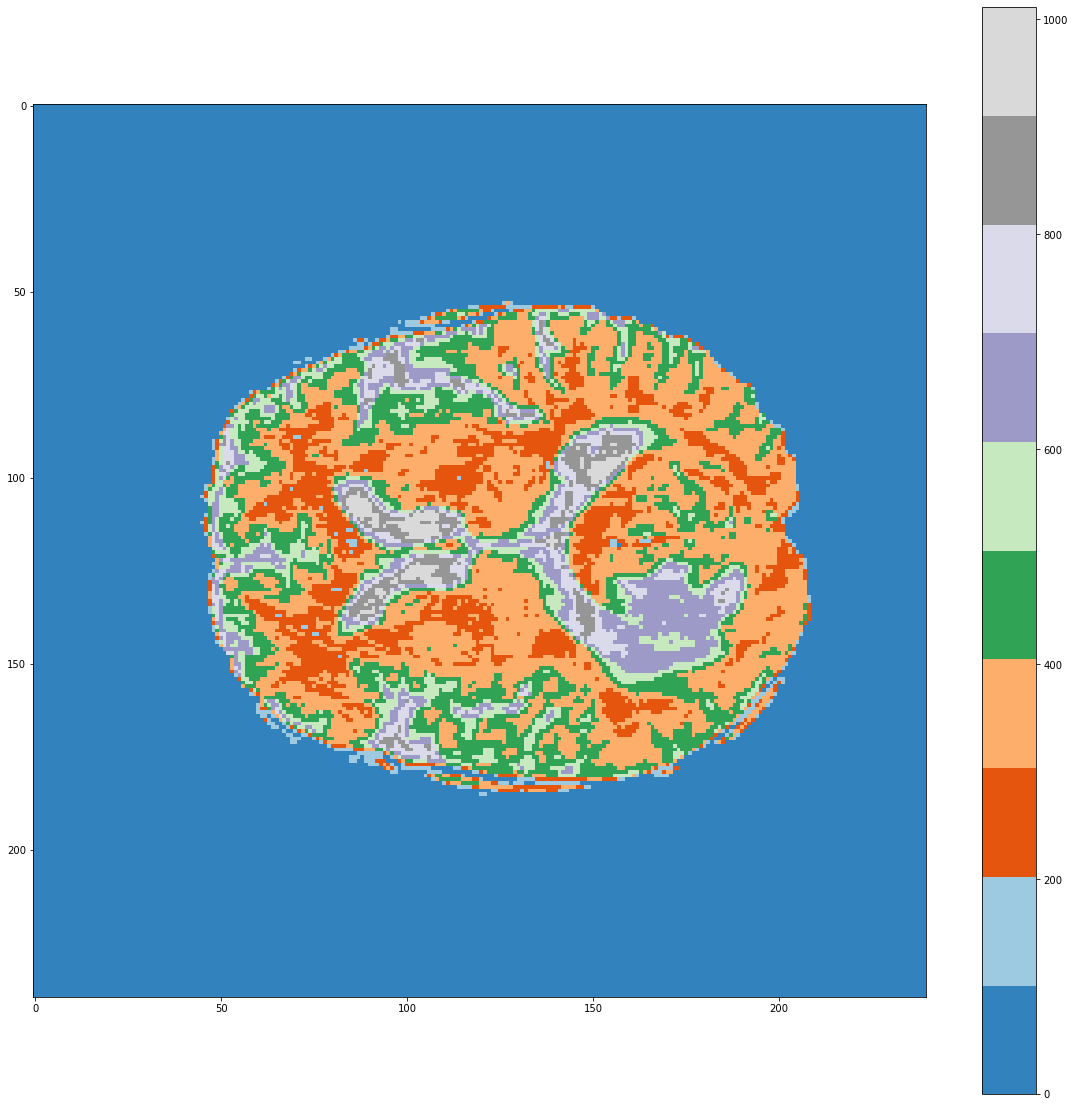

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
cmap = plt.cm.get_cmap("tab20c",lut= 10)
plt.imshow(image_data[:,:,80], cmap=cmap)
#plt.rcParams["figure.figsize"] = (20,3)

plt.colorbar()

#from matplotlib.pyplot import figure
#figure(figsize=(18, 16), dpi=80)


# Ground Truth

In [28]:
print("Este bloque para ground truth")

carpetaRoot="brats_2013_pat0002_1/"
carpetaSub=r"/VSD.Brain_3more.XX.O.OT.54523//"
archivo=r"VSD.Brain_3more.XX.O.OT.54523.mha"

image_data, image_header = mp.load(carpetaRoot+carpetaSub+archivo)

print("Ojo son 155 niveles en z")
print(image_data.shape)
print("Son del tipo numpy.ndarray")
print(type(image_data))
print("Valores unicos en todas las capas")
print(np.unique(image_data))

im = Image.fromarray(image_data[:,:,80])
#im = im.convert('RGB')
im = im.resize((500, 500))

im.save("BRATSScript_out.png")

Este bloque para ground truth
Ojo son 155 niveles en z
(240, 240, 155)
Son del tipo numpy.ndarray
<class 'numpy.ndarray'>
Valores unicos en todas las capas
[0 1 2 3 4]


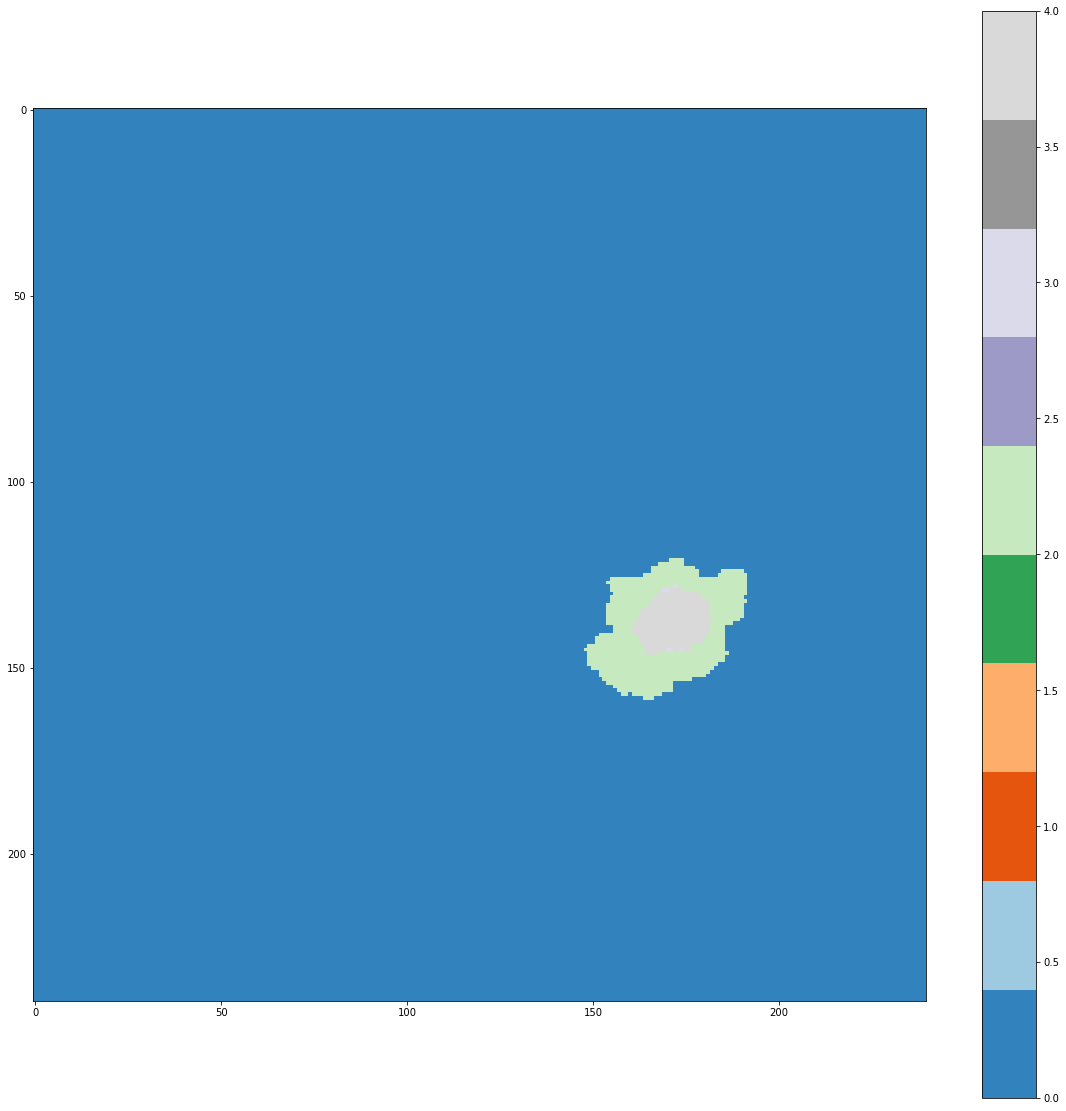

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
cmap = plt.cm.get_cmap("tab20c",lut= 10)
plt.imshow(image_data[:,:,80], cmap=cmap)
#plt.rcParams["figure.figsize"] = (20,3)

plt.colorbar()

#from matplotlib.pyplot import figure
#figure(figsize=(18, 16), dpi=80)


# DESCARGAR RAW IMAGE

In [33]:
print("Este bloque para raw data")

carpetaRoot="brats_2013_pat0002_1/"
carpetaSub=r"/VSD.Brain.XX.O.MR_T2.54521//"
archivo=r"VSD.Brain.XX.O.MR_T2.54521.mha"

image_data, image_header = mp.load(carpetaRoot+carpetaSub+archivo)

for i in range(155):
    im = Image.fromarray(image_data[:,:,i])
    im = im.convert('RGB')
    im = im.resize((500, 500))
    im = ImageOps.flip(im)
    im = im.rotate(-90)
    im.save(r"abrirBRATS_OUT//JPEGImages//BRATSScript_out_"+str(i)+".jpg")
    
print("Lo malo es que se guarda rotada la imagen no se por que")

Este bloque para raw data
Lo malo es que se guarda rotada la imagen no se por que


# DESCARGAR GROUND TRUTH

In [34]:
print("Este bloque para raw data")

carpetaRoot="brats_2013_pat0002_1/"
carpetaSub=r"/VSD.Brain_3more.XX.O.OT.54523//"
archivo=r"VSD.Brain_3more.XX.O.OT.54523.mha"

image_data, image_header = mp.load(carpetaRoot+carpetaSub+archivo)

for i in range(155):
    im = Image.fromarray(image_data[:,:,i])
    #im = im.convert('RGB')
    im = im.resize((500, 500))
    im = ImageOps.flip(im)
    im = im.rotate(-90)
    im.save(r"abrirBRATS_OUT//SegmentationClass//BRATSScript_out_"+str(i)+".png")
    
print("Lo malo es que se guarda rotada la imagen no se por que")

Este bloque para raw data
Lo malo es que se guarda rotada la imagen no se por que


# FIN ALGORITMO LO DEMAS SON VESTIGIOS

In [23]:
#image_data, image_header = mp.load(carpetaRoot+carpetaSub+archivo)

In [24]:
#print("Ojo son 155 niveles en z")
#print(image_data.shape)
#print("Son del tipo numpy.ndarray")
#print(type(image_data))
#print("Valores unicos en todas las capas")
#print(np.unique(image_data))

In [7]:
#image_data, image_header = mp.load("drinkwater.jpg")

In [18]:
#print("Hay que hacer un loop para recorrer todos los stacks de todas las imagenes del dataset, para transformarlas a imagenes")
#print("Por lo menos sirve para transformar las imagenes de las carpetas 3 more (ground truth) a png")
#im = Image.fromarray(image_data[:,:,80])
#im = im.convert('RGB')
#im = im.resize((500, 500))
#im.save("BRATSScript_out.jpg")

In [26]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(20,20))
#cmap = plt.cm.get_cmap("tab20c",lut= 10)
#plt.imshow(image_data[:,:,80], cmap=cmap)
#plt.rcParams["figure.figsize"] = (20,3)

#plt.colorbar()

#from matplotlib.pyplot import figure
#figure(figsize=(18, 16), dpi=80)


In [10]:
0/0

ZeroDivisionError: division by zero

In [ ]:
print("Hay que hacer un loop para recorrer todos los stacks de todas las imagenes del dataset, para transformarlas a imagenes")
print("Por lo menos sirve para transformar las imagenes de las carpetas 3 more (ground truth) a png")
im = Image.fromarray(image_data)
im.save("your_file23.jpg")

In [ ]:
from PIL import Image
im = Image.fromarray(image_data)
im.save("your_file2.png")

In [ ]:
print("Valores unicos en una capa particular")
np.unique(image_data[:,:,80])

In [ ]:
image_header

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
cmap = plt.cm.get_cmap("tab20c",lut= 10)
plt.imshow(image_data[:,:,80], cmap=cmap)
#plt.rcParams["figure.figsize"] = (20,3)

plt.colorbar()

#from matplotlib.pyplot import figure
#figure(figsize=(18, 16), dpi=80)


In [ ]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.imshow(image_data[:,:,50])
plt.colorbar()
plt.plot()


In [ ]:
import itk

In [ ]:
image = itk.imread('VSD.Brain_3more.XX.O.OT.42407.mha')
itk.imwrite(image, 'out.png')

In [ ]:
image_data[:,:,50]

In [ ]:
np.unique(image_data[:,:,50])

# Otra

In [ ]:
import SimpleITK as sitk
import numpy as np
import cv2
import os

In [ ]:

 
def mha2jpg(mhaPath,outFolder,windowsCenter,windowsSize):
    
    """
    The function can output a group of jpg files by a specified mha file.
    Args:
        mhaPath:mha file path.
        outfolder:The folder that the jpg files are saved.
        windowsCenter:the CT windows center.
        windowsSize:the CT windows size.
    Return:void
    """
    image = sitk.ReadImage(mhaPath)
    img_data = sitk.GetArrayFromImage(image)
    channel = img_data.shape[0]
 
    if not os.path.exists(outFolder):
        os.makedirs(outFolder)
 
 
    low = windowsCenter-windowsSize/2
    high = windowsCenter+windowsSize/2
 
    for s in range(channel):
        slicer = img_data[s,:,:]
        slicer[slicer<low] = low
        slicer[slicer>high] = high
        slicer = slicer-low
        img = cv2.normalize(slicer, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        cv2.imwrite(os.path.join(outFolder,str(s)+'.jpg'),img)
 
def main():
    mha = input("Enter the mha path:")
    out = input("Enter the out folder:")
    wc = int(input("Enter the windows center:"))
    ws = int(input("Enter the windows size:"))
    mha2jpg(mha,out,wc,ws)
 

In [ ]:
mha2jpg("VSD.Brain_3more.XX.O.OT.42407.mha","outputimages",0,0)

In [ ]:
import SimpleITK as sitk
import numpy as np

In [ ]:
url = "VSD.Brain_3more.XX.O.OT.42407.mha"

image = sitk.ReadImage(url)

max_index = image.GetDepth() # or image.GetWidth() or image.GetHeight() depending on the axis along which you want to extract

# As list of 2D SimpleITK images
list_of_2D_images = [image[:,:,i] for i in range(max_index)]

# As list of 2D numpy arrays which cannot be modified (no data copied) 
list_of_2D_images_np_view = [sitk.GetArrayViewFromImage(image[:,:,i]) for i in range(max_index)]

# As list of 2D numpy arrays (data copied to numpy array)
list_of_2D_images_np = [sitk.GetArrayFromImage(image[:,:,i]) for i in range(max_index)]

In [ ]:
list_of_2D_images_np

In [ ]:
0/0

In [ ]:
import numpy as np
from matplotlib import cm

IMG_DIM = 240

def plot_cube(cube, angle=320):
    cube = normalize(cube)
    
    facecolors = cm.viridis(cube)
    facecolors[:,:,:,-1] = cube
    facecolors = explode(facecolors)
    
    filled = facecolors[:,:,:,-1] != 0
    x, y, z = expand_coordinates(np.indices(np.array(filled.shape) + 1))

    fig = plt.figure(figsize=(30/2.54, 30/2.54))
    ax = fig.gca(projection='3d')
    ax.view_init(30, angle)
    ax.set_xlim(right=IMG_DIM*2)
    ax.set_ylim(top=IMG_DIM*2)
    ax.set_zlim(top=IMG_DIM*2)
    
    ax.voxels(x, y, z, filled, facecolors=facecolors, shade=False)
    plt.show()
    
def normalize(arr):
    arr_min = np.min(arr)
    return (arr-arr_min)/(np.max(arr)-arr_min)

def explode(data):
    shape_arr = np.array(data.shape)
    size = shape_arr[:3]*2 - 1
    exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
    exploded[::2, ::2, ::2] = data
    return exploded

def expand_coordinates(indices):
    x, y, z = indices
    x[1::2, :, :] += 1
    y[:, 1::2, :] += 1
    z[:, :, 1::2] += 1
    return x, y, z


In [ ]:
plot_cube(image_data)


In [ ]:
import matplotlib.image as mpimg
#img = mpimg.imread('your_image.png')
imgplot = plt.imshow(image_data[0])
plt.show()

In [ ]:
0/0

In [ ]:
import SimpleITK
inputImage = SimpleITK.ReadImage( 'VSD.Brain_3more.XX.O.OT.42407.mha' )

In [ ]:
inputImage

In [ ]:
import matplotlib
imshow(image_data)

In [ ]:
from PIL import Image

In [ ]:
img = Image.fromarray(mage_data, 'RGB')

In [ ]:
img.show()